In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC # SVM algorithm

In [2]:
df2 = pd.read_csv("diabetes_binary_health_indicators_BRFSS2021.csv")

from imblearn.under_sampling import NearMiss
X2 = df2.drop('Diabetes_binary', axis=1)
y2 = df2['Diabetes_binary']

scaler = StandardScaler()
X_scaled2 = pd.DataFrame(scaler.fit_transform(X2), columns=X2.columns, index=X2.index)

print("The First 5 raws after the preprocessing step:")
print(X_scaled2.head())

if X_scaled2.isnull().any().any():
    print("\nUYARI: There are NAN values. It changed the median value.")
    X_scaled2 = X_scaled2.fillna(X_scaled2.median())

variances = X_scaled2.var()
low_variance_cols = variances[variances < 1e-6].index

if len(low_variance_cols) > 0:
    print(f"\nUYARI: There is a zero/low variance of some columns and remove: {low_variance_cols.tolist()}")
    X_final2 = X_scaled2.drop(columns=low_variance_cols)
else:
    X_final2 = X_scaled2

nm = NearMiss()

# Apply the sampling to the training data
X_resampled2, y_resampled2 = nm.fit_resample(X_final2, y2)

print(X_resampled2)

The First 5 raws after the preprocessing step:
     HighBP  HighChol  CholCheck       BMI    Smoker    Stroke  \
0 -0.848448  1.219506   0.195058 -2.129654  1.194656 -0.201181   
1  1.178623 -0.820004   0.195058 -0.145539 -0.837061 -0.201181   
2  1.178623  1.219506   0.195058  0.617582 -0.837061 -0.201181   
3 -0.848448  1.219506   0.195058  0.007085 -0.837061  4.970637   
4 -0.848448 -0.820004   0.195058 -0.756036  1.194656 -0.201181   

   HeartDiseaseorAttack  PhysActivity    Fruits   Veggies  ...  AnyHealthcare  \
0             -0.307812     -1.878727  0.780791  0.456146  ...       0.197187   
1              3.248739     -1.878727  0.780791 -2.192282  ...       0.197187   
2             -0.307812      0.532275  0.780791  0.456146  ...       0.197187   
3              3.248739      0.532275  0.780791  0.456146  ...       0.197187   
4             -0.307812     -1.878727 -1.280753 -2.192282  ...       0.197187   

   NoDocbcCost   GenHlth  MentHlth  PhysHlth  DiffWalk       Sex     

In [3]:
cov_matrix_2 = X_resampled2.cov()
print("Dataset2 Covariance Matrix:\n")
print(cov_matrix_2)


Dataset2 Covariance Matrix:

                        HighBP  HighChol  CholCheck       BMI    Smoker  \
HighBP                0.992855  0.291112   0.000126  0.238715  0.170542   
HighChol              0.291112  1.029348   0.003220  0.093717  0.148778   
CholCheck             0.000126  0.003220   0.070274 -0.001476 -0.005458   
BMI                   0.238715  0.093717  -0.001476  0.931284  0.085551   
Smoker                0.170542  0.148778  -0.005458  0.085551  0.951008   
Stroke                0.119905  0.073877  -0.004779  0.044095  0.087563   
HeartDiseaseorAttack  0.220203  0.173756  -0.003254  0.088600  0.193112   
PhysActivity         -0.176397 -0.108856   0.005905 -0.242487 -0.143368   
Fruits               -0.111662 -0.095864   0.003685 -0.149303 -0.106290   
Veggies              -0.098034 -0.077579   0.005500 -0.100861 -0.068649   
HvyAlcoholConsump     0.017058  0.013057  -0.003816  0.013774  0.040155   
AnyHealthcare        -0.005279 -0.007205   0.015433 -0.021660 -0.017821

In [4]:
def strongest_covariances(cov_matrix, top_n=20):
    cov_pairs = cov_matrix.abs().unstack()
    cov_pairs = cov_pairs[cov_pairs < cov_pairs.max()]  # diagonal kaldır
    return cov_pairs.sort_values(ascending=False).head(top_n)

print("Dataset1: Strongest Covariances")
print(strongest_covariances(cov_matrix_2))

Dataset1: Strongest Covariances
Stroke        Stroke          1.124411
DiffWalk      DiffWalk        1.102385
PhysHlth      PhysHlth        1.039784
HighChol      HighChol        1.029348
Sex           Sex             0.994626
HighBP        HighBP          0.992855
Smoker        Smoker          0.951008
Education     Education       0.950982
BMI           BMI             0.931284
Income        Income          0.929464
PhysActivity  PhysActivity    0.923872
GenHlth       GenHlth         0.902791
Fruits        Fruits          0.896062
Veggies       Veggies         0.733125
MentHlth      MentHlth        0.714791
NoDocbcCost   NoDocbcCost     0.579503
Age           Age             0.565638
PhysHlth      DiffWalk        0.552424
DiffWalk      PhysHlth        0.552424
GenHlth       PhysHlth        0.551790
dtype: float64


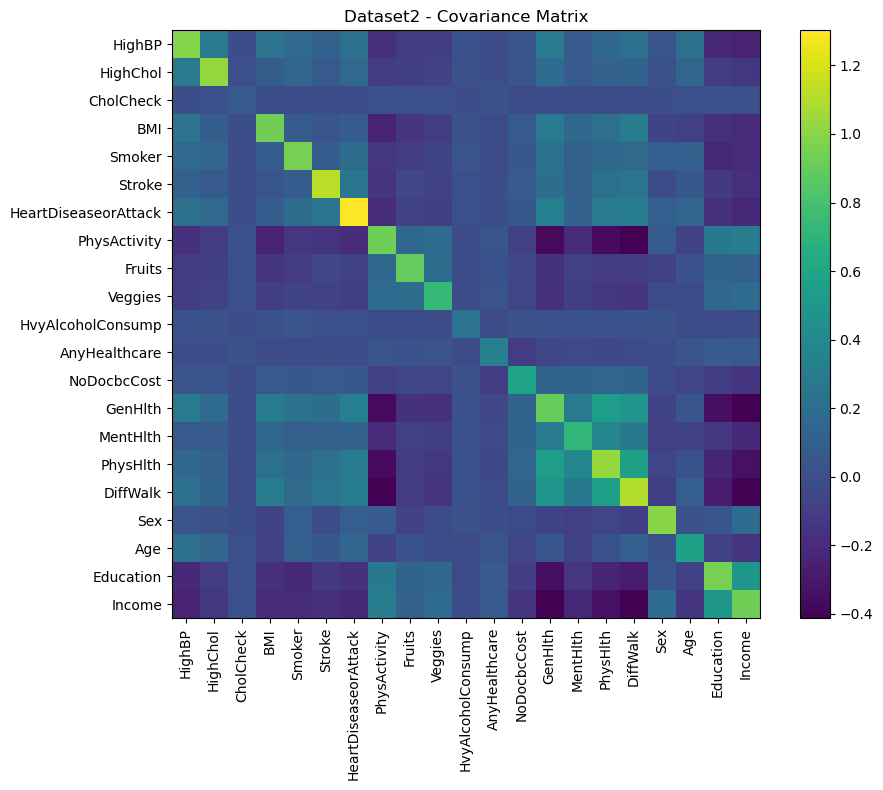

In [7]:
import matplotlib.pyplot as plt
def plot_covariance_matrix(cov_matrix, title):
    plt.figure(figsize=(10, 8))
    plt.imshow(cov_matrix, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    plt.xticks(range(len(cov_matrix.columns)), cov_matrix.columns, rotation=90)
    plt.yticks(range(len(cov_matrix.columns)), cov_matrix.columns)
    plt.tight_layout()
    plt.show()
    
plot_covariance_matrix(cov_matrix_2, "Dataset2 - Covariance Matrix")

In [8]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca2 = pca.fit_transform(X_resampled2)

explained_variance2 = np.cumsum(pca.explained_variance_ratio_)

n_components_95_2 = np.argmax(explained_variance2 >= 0.95) + 1

print("For the 95% variance number of features:", n_components_95_2)

For the 95% variance number of features: 18


In [9]:
pca = PCA(n_components=n_components_95_2)
X_pca2 = pca.fit_transform(X_resampled2)

loadings2 = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(n_components_95_2)],
    index=X_resampled2.columns
)

feature_importance2 = loadings2.abs().sum(axis=1)

feature_importance2 = feature_importance2.sort_values(ascending=False)

print("Feature Importance According to PCA:\n")
print(feature_importance2)

Feature Importance According to PCA:

BMI                     3.646932
PhysHlth                3.624394
DiffWalk                3.589694
HighBP                  3.582859
Education               3.457871
Fruits                  3.336657
HighChol                3.251777
Income                  3.212765
MentHlth                3.204523
Smoker                  3.126420
Age                     3.033099
Sex                     3.025245
Veggies                 3.020042
PhysActivity            2.880436
GenHlth                 2.854165
HeartDiseaseorAttack    2.824021
NoDocbcCost             2.745346
Stroke                  2.652840
AnyHealthcare           1.314417
HvyAlcoholConsump       0.391433
CholCheck               0.110968
dtype: float64


In [12]:
pca = PCA()
pca.fit(X_resampled2)

importance_df2 = pd.DataFrame({
    'Component': [f'Basis Component {i+1}' for i in range(len(pca.explained_variance_ratio_))],
    'Representation Ratio (%)': pca.explained_variance_ratio_ * 100,
    'Cumulative Ratio (%)': np.cumsum(pca.explained_variance_ratio_) * 100
})

importance_df2 = importance_df2.round(2)

print("--- PCA Variances Tables ---")
print(importance_df2.to_string(index=False))

loadings2 = pd.DataFrame(
    np.abs(pca.components_[0]), 
    index=X_resampled2.columns, 
    columns=['impact_score']
).sort_values(by='impact_score', ascending=False)

print("\n--- Features Contributing Most to the First Component (The Most Significant Part) ---")
print(loadings2)

--- PCA Variances Tables ---
         Component  Representation Ratio (%)  Cumulative Ratio (%)
 Basis Component 1                     23.68                 23.68
 Basis Component 2                      8.23                 31.91
 Basis Component 3                      7.08                 38.98
 Basis Component 4                      6.21                 45.19
 Basis Component 5                      5.62                 50.81
 Basis Component 6                      5.35                 56.16
 Basis Component 7                      4.94                 61.10
 Basis Component 8                      4.68                 65.78
 Basis Component 9                      4.28                 70.06
Basis Component 10                      4.10                 74.16
Basis Component 11                      3.67                 77.83
Basis Component 12                      3.36                 81.19
Basis Component 13                      3.27                 84.46
Basis Component 14               

In [13]:
import seaborn as sns
correlations = df2.corr()['Diabetes_binary'].abs().sort_values(ascending=False)
print("--- According to Class Select Features ---")

# Grup 1: HighBP, HighChol, BMI
group1 = ['HighBP', 'HighChol', 'BMI']
best_g1 = correlations[group1].idxmax()
g1 = correlations[group1]
print(f"Grup 1 : {best_g1} (Correlation: {correlations[best_g1]:.3f})")
print(g1)

# Grup 2: Stroke, HeartDiseaseorAttack
group2 = ['Stroke', 'HeartDiseaseorAttack']
best_g2 = correlations[group2].idxmax()
g2 = correlations[group2]
print(f"Grup 2 : {best_g2} (Correlation: {correlations[best_g2]:.3f})")
print(g2)

# Grup 3: PhysHlth, MentHlth, GenHlth, DiffWalk
group3 = ['PhysHlth', 'MentHlth', 'GenHlth', 'DiffWalk']
best_g3 = correlations[group3].idxmax()
g3 = correlations[group3]
print(f"Grup 3 : {best_g3} (Correlation: {correlations[best_g3]:.3f})")
print(g3)

group4 = ['Income', 'Education']
best_g4 = correlations[group4].idxmax()
g4 = correlations[group4]
print(f"Grup 4 : {best_g4} (Correlation: {correlations[best_g4]:.3f})")
print(g4)

group5 = ['Fruits', 'Veggies', 'PhysActivity']
best_g5 = correlations[group5].idxmax()
g5 = correlations[group5]
print(f"Grup 5 : {best_g5} (Correlation: {correlations[best_g5]:.3f})")
print(g5)


--- According to Class Select Features ---
Grup 1 : HighBP (Correlation: 0.260)
HighBP      0.260338
HighChol    0.197046
BMI         0.200783
Name: Diabetes_binary, dtype: float64
Grup 2 : HeartDiseaseorAttack (Correlation: 0.175)
Stroke                  0.101557
HeartDiseaseorAttack    0.175338
Name: Diabetes_binary, dtype: float64
Grup 3 : GenHlth (Correlation: 0.279)
PhysHlth    0.160067
MentHlth    0.036099
GenHlth     0.278851
DiffWalk    0.209561
Name: Diabetes_binary, dtype: float64
Grup 4 : Income (Correlation: 0.151)
Income       0.151469
Education    0.102297
Name: Diabetes_binary, dtype: float64
Grup 5 : PhysActivity (Correlation: 0.148)
Fruits          0.028694
Veggies         0.046045
PhysActivity    0.147951
Name: Diabetes_binary, dtype: float64


In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#according to relation between the features from co-variance matrix select 1 and 2 features for any group
pca2 = PCA(n_components=9)
X_pca2 = pca2.fit_transform(X_resampled2)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_pca2, y_resampled2, test_size=0.2, random_state=42)

In [16]:
#Logistic Regression
model = LogisticRegression(max_iter=100)
model.fit(X_train2, y_train2)

# 8. Test Etme ve Sonuçları Raporlama
y_pred = model.predict(X_test2)

print("\n--- Model Results ---")
print(f"Accuracy (Doğruluk) Skoru: {accuracy_score(y_test2, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test2, y_pred))


--- Model Results ---
Accuracy (Doğruluk) Skoru: 0.8422

Classification Report:
              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85      6614
         1.0       0.89      0.79      0.84      6814

    accuracy                           0.84     13428
   macro avg       0.85      0.84      0.84     13428
weighted avg       0.85      0.84      0.84     13428



In [17]:
#LR with class weight parameter
best_lr_model = LogisticRegression(
    C=1, 
    penalty='l2', 
    solver='lbfgs', 
    class_weight='balanced', # For the unbalanced dataset
    max_iter=200
)
best_lr_model.fit(X_train2, y_train2)
y_pred2 = best_lr_model.predict(X_test2)

print(f"Final Model Accuracy: {accuracy_score(y_test2, y_pred2):.4f}")
print("\nClassification Report:\n", classification_report(y_test2, y_pred2))

Final Model Accuracy: 0.8422

Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.90      0.85      6614
         1.0       0.89      0.79      0.84      6814

    accuracy                           0.84     13428
   macro avg       0.85      0.84      0.84     13428
weighted avg       0.85      0.84      0.84     13428



In [18]:
#Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the scaled data
rf_model.fit(X_train2, y_train2)

print("Random Forest Model Trained Successfully.")

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test2)
print("\n--- Model Evaluation Results ---")

# 4a. Accuracy Score
accuracy = accuracy_score(y_test2, y_pred_rf)
print(f"Accuracy Score: {accuracy:.4f}\n")

# 4b. Classification Report (Provides Precision, Recall, F1-Score)
print("Classification Report:")
print(classification_report(y_test2, y_pred_rf))

Random Forest Model Trained Successfully.

--- Model Evaluation Results ---
Accuracy Score: 0.8436

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85      6614
         1.0       0.87      0.81      0.84      6814

    accuracy                           0.84     13428
   macro avg       0.85      0.84      0.84     13428
weighted avg       0.85      0.84      0.84     13428



In [19]:
#Random Forest
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced_subsample',random_state=42)

# Train the model using the scaled data
rf_model.fit(X_train2, y_train2)

print("Random Forest Model Trained Successfully.")

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test2)
print("\n--- Model Evaluation Results ---")

# 4a. Accuracy Score
accuracy = accuracy_score(y_test2, y_pred_rf)
print(f"Accuracy Score: {accuracy:.4f}\n")

# 4b. Classification Report (Provides Precision, Recall, F1-Score)
print("Classification Report:")
print(classification_report(y_test2, y_pred_rf))

Random Forest Model Trained Successfully.

--- Model Evaluation Results ---
Accuracy Score: 0.8452

Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85      6614
         1.0       0.88      0.81      0.84      6814

    accuracy                           0.85     13428
   macro avg       0.85      0.85      0.85     13428
weighted avg       0.85      0.85      0.85     13428



In [20]:
#SVM with linear kernel

from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train2, y_train2)
print("\n--- SVM Model Complete Training ---")

y_pred_svm = svm_model.predict(X_test2)

accuracy = accuracy_score(y_test2, y_pred_svm)
print(f"\n (Accuracy): {accuracy:.4f}\n")

print("--- Classification_report ---")
print(classification_report(y_test2, y_pred_svm))


--- SVM Model Complete Training ---

 (Accuracy): 0.8433

--- Classification_report ---
              precision    recall  f1-score   support

         0.0       0.80      0.91      0.85      6614
         1.0       0.90      0.78      0.83      6814

    accuracy                           0.84     13428
   macro avg       0.85      0.84      0.84     13428
weighted avg       0.85      0.84      0.84     13428



In [21]:
#SVM with linear kernel class_weight parameter

from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
svm_model = SVC(kernel='linear', class_weight='balanced',random_state=42)
svm_model.fit(X_train2, y_train2)
print("\n--- SVM Model Complete Training ---")

y_pred_svm = svm_model.predict(X_test2)

accuracy = accuracy_score(y_test2, y_pred_svm)
print(f"\n (Accuracy): {accuracy:.4f}\n")

print("--- Classification_report ---")
print(classification_report(y_test2, y_pred_svm))


--- SVM Model Complete Training ---

 (Accuracy): 0.8436

--- Classification_report ---
              precision    recall  f1-score   support

         0.0       0.80      0.91      0.85      6614
         1.0       0.90      0.78      0.83      6814

    accuracy                           0.84     13428
   macro avg       0.85      0.84      0.84     13428
weighted avg       0.85      0.84      0.84     13428



In [22]:
#SVM with rbf kernel

from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train2, y_train2)
print("\n--- SVM Model Complete Training ---")

y_pred_svm = svm_model.predict(X_test2)

accuracy = accuracy_score(y_test2, y_pred_svm)
print(f"\n (Accuracy): {accuracy:.4f}\n")

print("--- Classification_report ---")
print(classification_report(y_test2, y_pred_svm))


--- SVM Model Complete Training ---

 (Accuracy): 0.8503

--- Classification_report ---
              precision    recall  f1-score   support

         0.0       0.80      0.92      0.86      6614
         1.0       0.91      0.78      0.84      6814

    accuracy                           0.85     13428
   macro avg       0.86      0.85      0.85     13428
weighted avg       0.86      0.85      0.85     13428



In [23]:
#SVM with rbf kernel gamma = 0.01

from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
svm_model = SVC(kernel='rbf', gamma = 0.01, random_state=42)
svm_model.fit(X_train2, y_train2)
print("\n--- SVM Model Complete Training ---")

y_pred_svm = svm_model.predict(X_test2)

accuracy = accuracy_score(y_test2, y_pred_svm)
print(f"\n (Accuracy): {accuracy:.4f}\n")

print("--- Classification_report ---")
print(classification_report(y_test2, y_pred_svm))


--- SVM Model Complete Training ---

 (Accuracy): 0.8469

--- Classification_report ---
              precision    recall  f1-score   support

         0.0       0.80      0.92      0.86      6614
         1.0       0.91      0.77      0.84      6814

    accuracy                           0.85     13428
   macro avg       0.85      0.85      0.85     13428
weighted avg       0.86      0.85      0.85     13428



In [24]:
#SVM with rbf kernel gamma 0.1
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
svm_model = SVC(kernel='rbf', gamma = 0.1, random_state=42)
svm_model.fit(X_train2, y_train2)
print("\n--- SVM Model Complete Training ---")

y_pred_svm = svm_model.predict(X_test2)

accuracy = accuracy_score(y_test2, y_pred_svm)
print(f"\n (Accuracy): {accuracy:.4f}\n")

print("--- Classification_report ---")
print(classification_report(y_test2, y_pred_svm))


--- SVM Model Complete Training ---

 (Accuracy): 0.8514

--- Classification_report ---
              precision    recall  f1-score   support

         0.0       0.80      0.92      0.86      6614
         1.0       0.91      0.78      0.84      6814

    accuracy                           0.85     13428
   macro avg       0.86      0.85      0.85     13428
weighted avg       0.86      0.85      0.85     13428



In [25]:
#SVM with polynomial kernel
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
svm_model = SVC(kernel='poly', random_state=42)
svm_model.fit(X_train2, y_train2)
print("\n--- SVM Model Complete Training ---")

y_pred_svm = svm_model.predict(X_test2)

accuracy = accuracy_score(y_test2, y_pred_svm)
print(f"\n (Accuracy): {accuracy:.4f}\n")

print("--- Classification_report ---")
print(classification_report(y_test2, y_pred_svm))


--- SVM Model Complete Training ---

 (Accuracy): 0.8426

--- Classification_report ---
              precision    recall  f1-score   support

         0.0       0.79      0.93      0.85      6614
         1.0       0.92      0.76      0.83      6814

    accuracy                           0.84     13428
   macro avg       0.85      0.84      0.84     13428
weighted avg       0.85      0.84      0.84     13428



In [26]:
#SVM with polynomial kernel gamma = 0.01
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
svm_model = SVC(kernel='poly', gamma = 0.01, random_state=42)
svm_model.fit(X_train2, y_train2)
print("\n--- SVM Model Complete Training ---")

y_pred_svm = svm_model.predict(X_test2)

accuracy = accuracy_score(y_test2, y_pred_svm)
print(f"\n (Accuracy): {accuracy:.4f}\n")

print("--- Classification_report ---")
print(classification_report(y_test2, y_pred_svm))


--- SVM Model Complete Training ---

 (Accuracy): 0.7602

--- Classification_report ---
              precision    recall  f1-score   support

         0.0       0.68      0.97      0.80      6614
         1.0       0.95      0.55      0.70      6814

    accuracy                           0.76     13428
   macro avg       0.82      0.76      0.75     13428
weighted avg       0.82      0.76      0.75     13428



In [27]:
#SVM with rbf polynomial gamma 0.1
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
svm_model = SVC(kernel='poly', gamma = 0.1, random_state=42)
svm_model.fit(X_train2, y_train2)
print("\n--- SVM Model Complete Training ---")

y_pred_svm = svm_model.predict(X_test2)

accuracy = accuracy_score(y_test2, y_pred_svm)
print(f"\n (Accuracy): {accuracy:.4f}\n")

print("--- Classification_report ---")
print(classification_report(y_test2, y_pred_svm))


--- SVM Model Complete Training ---

 (Accuracy): 0.8426

--- Classification_report ---
              precision    recall  f1-score   support

         0.0       0.79      0.93      0.85      6614
         1.0       0.91      0.76      0.83      6814

    accuracy                           0.84     13428
   macro avg       0.85      0.84      0.84     13428
weighted avg       0.85      0.84      0.84     13428



In [28]:
#SVM with sigmoid kernel
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
svm_model = SVC(kernel='sigmoid', random_state=42)
svm_model.fit(X_train2, y_train2)
print("\n--- SVM Model Complete Training ---")

y_pred_svm = svm_model.predict(X_test2)

accuracy = accuracy_score(y_test2, y_pred_svm)
print(f"\n (Accuracy): {accuracy:.4f}\n")

print("--- Classification_report ---")
print(classification_report(y_test2, y_pred_svm))


--- SVM Model Complete Training ---

 (Accuracy): 0.7951

--- Classification_report ---
              precision    recall  f1-score   support

         0.0       0.79      0.80      0.79      6614
         1.0       0.80      0.79      0.80      6814

    accuracy                           0.80     13428
   macro avg       0.80      0.80      0.80     13428
weighted avg       0.80      0.80      0.80     13428



In [30]:
#SVM with sigmoid kernel gamma = 0.01
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
svm_model = SVC(kernel='sigmoid', gamma = 0.01, random_state=42)
svm_model.fit(X_train2, y_train2)
print("\n--- SVM Model Complete Training ---")

y_pred_svm = svm_model.predict(X_test2)

accuracy = accuracy_score(y_test2, y_pred_svm)
print(f"\n (Accuracy): {accuracy:.4f}\n")

print("--- Classification_report ---")
print(classification_report(y_test2, y_pred_svm))


--- SVM Model Complete Training ---

 (Accuracy): 0.8432

--- Classification_report ---
              precision    recall  f1-score   support

         0.0       0.80      0.91      0.85      6614
         1.0       0.90      0.78      0.83      6814

    accuracy                           0.84     13428
   macro avg       0.85      0.84      0.84     13428
weighted avg       0.85      0.84      0.84     13428



In [31]:
#SVM with rbf sigmoid gamma 0.1
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
svm_model = SVC(kernel='sigmoid', gamma = 0.1, random_state=42)
svm_model.fit(X_train2, y_train2)
print("\n--- SVM Model Complete Training ---")

y_pred_svm = svm_model.predict(X_test2)

accuracy = accuracy_score(y_test2, y_pred_svm)
print(f"\n (Accuracy): {accuracy:.4f}\n")

print("--- Classification_report ---")
print(classification_report(y_test2, y_pred_svm))


--- SVM Model Complete Training ---

 (Accuracy): 0.7852

--- Classification_report ---
              precision    recall  f1-score   support

         0.0       0.78      0.79      0.78      6614
         1.0       0.79      0.78      0.79      6814

    accuracy                           0.79     13428
   macro avg       0.79      0.79      0.79     13428
weighted avg       0.79      0.79      0.79     13428



In [32]:
#SVR - linear
from sklearn.svm import SVR
svr_model = SVR(kernel='linear')
svr_model.fit(X_train2, y_train2)

y_pred_continuous = svr_model.predict(X_test2)

THRESHOLD = 0.5
y_pred_binary = (y_pred_continuous >= THRESHOLD).astype(int)

accuracy = accuracy_score(y_test2, y_pred_binary)
print(f"Accuracy Score: {accuracy:.4f}\n")

print("--- SVR (Thresholded) Classification Metrics ---")
print(classification_report(y_test2, y_pred_binary))

Accuracy Score: 0.8029

--- SVR (Thresholded) Classification Metrics ---
              precision    recall  f1-score   support

         0.0       0.73      0.95      0.83      6614
         1.0       0.93      0.66      0.77      6814

    accuracy                           0.80     13428
   macro avg       0.83      0.81      0.80     13428
weighted avg       0.83      0.80      0.80     13428



In [33]:
#SVR - rbf
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train2, y_train2)

y_pred_continuous = svr_model.predict(X_test2)

THRESHOLD = 0.5
y_pred_binary = (y_pred_continuous >= THRESHOLD).astype(int)

accuracy = accuracy_score(y_test2, y_pred_binary)
print(f"Accuracy Score: {accuracy:.4f}\n")

print("--- SVR (Thresholded) Classification Metrics ---")
print(classification_report(y_test2, y_pred_binary))

Accuracy Score: 0.8508

--- SVR (Thresholded) Classification Metrics ---
              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86      6614
         1.0       0.91      0.78      0.84      6814

    accuracy                           0.85     13428
   macro avg       0.86      0.85      0.85     13428
weighted avg       0.86      0.85      0.85     13428



In [34]:
#SVR - rbf gamma 0.01
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf', gamma = 0.01)
svr_model.fit(X_train2, y_train2)

y_pred_continuous = svr_model.predict(X_test2)

THRESHOLD = 0.5
y_pred_binary = (y_pred_continuous >= THRESHOLD).astype(int)

accuracy = accuracy_score(y_test2, y_pred_binary)
print(f"Accuracy Score: {accuracy:.4f}\n")

print("--- SVR (Thresholded) Classification Metrics ---")
print(classification_report(y_test2, y_pred_binary))

Accuracy Score: 0.8403

--- SVR (Thresholded) Classification Metrics ---
              precision    recall  f1-score   support

         0.0       0.79      0.91      0.85      6614
         1.0       0.90      0.77      0.83      6814

    accuracy                           0.84     13428
   macro avg       0.85      0.84      0.84     13428
weighted avg       0.85      0.84      0.84     13428



In [35]:
#SVR - rbf gamma 0.1
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf', gamma = 0.1)
svr_model.fit(X_train2, y_train2)

y_pred_continuous = svr_model.predict(X_test2)

THRESHOLD = 0.5
y_pred_binary = (y_pred_continuous >= THRESHOLD).astype(int)

accuracy = accuracy_score(y_test2, y_pred_binary)
print(f"Accuracy Score: {accuracy:.4f}\n")

print("--- SVR (Thresholded) Classification Metrics ---")
print(classification_report(y_test2, y_pred_binary))

Accuracy Score: 0.8520

--- SVR (Thresholded) Classification Metrics ---
              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86      6614
         1.0       0.91      0.79      0.84      6814

    accuracy                           0.85     13428
   macro avg       0.86      0.85      0.85     13428
weighted avg       0.86      0.85      0.85     13428



In [36]:
#SVR - polynomial
from sklearn.svm import SVR
svr_model = SVR(kernel='poly')
svr_model.fit(X_train2, y_train2)

y_pred_continuous = svr_model.predict(X_test2)

THRESHOLD = 0.5
y_pred_binary = (y_pred_continuous >= THRESHOLD).astype(int)

accuracy = accuracy_score(y_test2, y_pred_binary)
print(f"Accuracy Score: {accuracy:.4f}\n")

print("--- SVR (Thresholded) Classification Metrics ---")
print(classification_report(y_test2, y_pred_binary))

Accuracy Score: 0.7754

--- SVR (Thresholded) Classification Metrics ---
              precision    recall  f1-score   support

         0.0       0.70      0.95      0.81      6614
         1.0       0.93      0.60      0.73      6814

    accuracy                           0.78     13428
   macro avg       0.81      0.78      0.77     13428
weighted avg       0.82      0.78      0.77     13428



In [37]:
#SVR - polynomial gamma 0.01
from sklearn.svm import SVR
svr_model = SVR(kernel='poly', gamma = 0.01)
svr_model.fit(X_train2, y_train2)

y_pred_continuous = svr_model.predict(X_test2)

THRESHOLD = 0.5
y_pred_binary = (y_pred_continuous >= THRESHOLD).astype(int)

accuracy = accuracy_score(y_test2, y_pred_binary)
print(f"Accuracy Score: {accuracy:.4f}\n")

print("--- SVR (Thresholded) Classification Metrics ---")
print(classification_report(y_test2, y_pred_binary))

Accuracy Score: 0.7496

--- SVR (Thresholded) Classification Metrics ---
              precision    recall  f1-score   support

         0.0       0.67      0.96      0.79      6614
         1.0       0.94      0.54      0.69      6814

    accuracy                           0.75     13428
   macro avg       0.80      0.75      0.74     13428
weighted avg       0.81      0.75      0.74     13428



In [38]:
#SVR - polynomial gamma 0.1
from sklearn.svm import SVR
svr_model = SVR(kernel='poly', gamma = 0.1)
svr_model.fit(X_train2, y_train2)

y_pred_continuous = svr_model.predict(X_test2)

THRESHOLD = 0.5
y_pred_binary = (y_pred_continuous >= THRESHOLD).astype(int)

accuracy = accuracy_score(y_test2, y_pred_binary)
print(f"Accuracy Score: {accuracy:.4f}\n")

print("--- SVR (Thresholded) Classification Metrics ---")
print(classification_report(y_test2, y_pred_binary))

Accuracy Score: 0.7755

--- SVR (Thresholded) Classification Metrics ---
              precision    recall  f1-score   support

         0.0       0.70      0.95      0.81      6614
         1.0       0.93      0.60      0.73      6814

    accuracy                           0.78     13428
   macro avg       0.81      0.78      0.77     13428
weighted avg       0.82      0.78      0.77     13428



In [39]:
#SVR - sigmoid
from sklearn.svm import SVR
svr_model = SVR(kernel='sigmoid')
svr_model.fit(X_train2, y_train2)

y_pred_continuous = svr_model.predict(X_test2)

THRESHOLD = 0.5
y_pred_binary = (y_pred_continuous >= THRESHOLD).astype(int)

accuracy = accuracy_score(y_test2, y_pred_binary)
print(f"Accuracy Score: {accuracy:.4f}\n")

print("--- SVR (Thresholded) Classification Metrics ---")
print(classification_report(y_test2, y_pred_binary))

Accuracy Score: 0.5787

--- SVR (Thresholded) Classification Metrics ---
              precision    recall  f1-score   support

         0.0       0.57      0.58      0.57      6614
         1.0       0.59      0.58      0.58      6814

    accuracy                           0.58     13428
   macro avg       0.58      0.58      0.58     13428
weighted avg       0.58      0.58      0.58     13428



In [40]:
#SVR - sigmoid gamma 0.01
from sklearn.svm import SVR
svr_model = SVR(kernel='sigmoid', gamma = 0.01)
svr_model.fit(X_train2, y_train2)

y_pred_continuous = svr_model.predict(X_test2)

THRESHOLD = 0.5
y_pred_binary = (y_pred_continuous >= THRESHOLD).astype(int)

accuracy = accuracy_score(y_test2, y_pred_binary)
print(f"Accuracy Score: {accuracy:.4f}\n")

print("--- SVR (Thresholded) Classification Metrics ---")
print(classification_report(y_test2, y_pred_binary))

Accuracy Score: 0.7202

--- SVR (Thresholded) Classification Metrics ---
              precision    recall  f1-score   support

         0.0       0.67      0.87      0.75      6614
         1.0       0.82      0.58      0.68      6814

    accuracy                           0.72     13428
   macro avg       0.74      0.72      0.72     13428
weighted avg       0.74      0.72      0.71     13428



In [41]:
#SVR - sigmoid gamma 0.1
from sklearn.svm import SVR
svr_model = SVR(kernel='sigmoid', gamma = 0.1)
svr_model.fit(X_train2, y_train2)

y_pred_continuous = svr_model.predict(X_test2)

THRESHOLD = 0.5
y_pred_binary = (y_pred_continuous >= THRESHOLD).astype(int)

accuracy = accuracy_score(y_test2, y_pred_binary)
print(f"Accuracy Score: {accuracy:.4f}\n")

print("--- SVR (Thresholded) Classification Metrics ---")
print(classification_report(y_test2, y_pred_binary))

Accuracy Score: 0.5705

--- SVR (Thresholded) Classification Metrics ---
              precision    recall  f1-score   support

         0.0       0.56      0.57      0.57      6614
         1.0       0.58      0.57      0.58      6814

    accuracy                           0.57     13428
   macro avg       0.57      0.57      0.57     13428
weighted avg       0.57      0.57      0.57     13428



In [42]:
#DecisionTree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)

dt_model.fit(X_train2, y_train2)
print("Decision Tree Model Trained Successfully.")


y_pred2 = dt_model.predict(X_test2)
print("\n--- Model Evaluation Results ---")

accuracy2 = accuracy_score(y_test2, y_pred2)
print(f"Accuracy Score: {accuracy2:.4f}\n")

print("Classification Report:")
print(classification_report(y_test2, y_pred2))

Decision Tree Model Trained Successfully.

--- Model Evaluation Results ---
Accuracy Score: 0.8265

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.86      0.83      6614
         1.0       0.86      0.79      0.82      6814

    accuracy                           0.83     13428
   macro avg       0.83      0.83      0.83     13428
weighted avg       0.83      0.83      0.83     13428



In [43]:
#DecisionTree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=None, random_state=42)

dt_model.fit(X_train2, y_train2)
print("Decision Tree Model Trained Successfully.")


y_pred2 = dt_model.predict(X_test2)
print("\n--- Model Evaluation Results ---")

accuracy2 = accuracy_score(y_test2, y_pred2)
print(f"Accuracy Score: {accuracy2:.4f}\n")

print("Classification Report:")
print(classification_report(y_test2, y_pred2))

Decision Tree Model Trained Successfully.

--- Model Evaluation Results ---
Accuracy Score: 0.8014

Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.81      0.80      6614
         1.0       0.81      0.79      0.80      6814

    accuracy                           0.80     13428
   macro avg       0.80      0.80      0.80     13428
weighted avg       0.80      0.80      0.80     13428



In [44]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
param_grid = {'n_neighbors': [7, 9, 11, 13, 15, 17, 19, 21]}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train2, y_train2)

print(f"En iyi komşu sayısı: {grid.best_params_['n_neighbors']}")

En iyi komşu sayısı: 19


In [45]:
#KNN
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train2, y_train2)


y_pred = knn.predict(X_test2)
print(f"Doğruluk: {accuracy_score(y_test2, y_pred)}")
print(classification_report(y_test2, y_pred))

Doğruluk: 0.8440571939231457
              precision    recall  f1-score   support

         0.0       0.79      0.93      0.86      6614
         1.0       0.92      0.76      0.83      6814

    accuracy                           0.84     13428
   macro avg       0.86      0.85      0.84     13428
weighted avg       0.86      0.84      0.84     13428



In [46]:
#GNB
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train2, y_train2)
y_pred = model.predict(X_test2)

print(f"Accuracy: {accuracy_score(y_test2, y_pred)}")
print(classification_report(y_test2, y_pred))
print(confusion_matrix(y_test2, y_pred))

Accuracy: 0.8176943699731903
              precision    recall  f1-score   support

         0.0       0.77      0.90      0.83      6614
         1.0       0.88      0.74      0.80      6814

    accuracy                           0.82     13428
   macro avg       0.83      0.82      0.82     13428
weighted avg       0.83      0.82      0.82     13428

[[5938  676]
 [1772 5042]]
